<a href="https://colab.research.google.com/github/shunte88/MiT_DSD/blob/main/Copy_of_LR_SVM_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression and Support Vector Machines


## Activity Overview

This activity is designed to consolidate the knowledge about logistic regression and support vector machines (SVMs) from a practical point of view.

In particular, the user will try to diagnostically predict whether a patient has diabetes by using the Python libraries pandas and `sklearn`. They will begin by reading the dataset diabetes from Kaggle.

The activity aims to help the user apply machine learning algorithms using the packages in Python. Python concepts, instructions, and starter code are embedded within a Jupyter Notebook to guide them as they progress through the activity. It’s essential to run the code of each cell before submitting the assignment. Upon completing the activity, the user is encouraged to compare their work against the solution file for self-assessment.

## Logistic Regression and Support Vector Machines

Logistic regression is a powerful fundamental machine learning method used for classification, but it is built on a regression framework.

Support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

### Importing the Dataset and Exploratory Data Analysis (EDA)

The dataset is imported using the `pandas` library. The file is read using the `.read_csv()` by passing the name of the dataset as a string.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import pandas as pd #import the library


df = pd.read_csv("diabetes.csv") #read the dataset
#Specify the correct location of the file.

Before performing any algorithm on the dataframe, it's always good practice to perform exploratory data analysis.

The first ten rows of the dataframe `df` is visualized using the function `.head()`. By default, `.head()` displays the first five rows of a dataframe.

Complete the code cell below by passing the desired number of rows to the function `.head()` as an integer.

In [ ]:
df.head( )
#df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Next, some properties of the dataframe are evaluated.

Here's a brief description of what each of the above functions do:

- `.shape`: Returns a tuple representing the dimensionality of the dataframe;
- `.columns`: Returns the column labels of the dataframe;
- `describe()`: Returns a statistical summary of the dataframe.


Run the cells below to get information aboout the dataframe.

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Understanding the Problem

Before we start setting up the problem in `Python` using logistic regression and SVMs, it is fundamental to understand which variable we're trying to predict and why the approach we are planning on using may work.

- **Observe the dataframe `df` above. Which variable would you like to predict for this problem?**


**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**

**YOUR ANSWER HERE:** Outcome


Understanding which variable we are trying to predict is important as we need to split our dataframe `df` into `X` and `y` dataframes. The `X` dataframe will contain all the variables in `df` that will be used to make the prediction; `y` will contain the dependent variable, in this case `Outcome`.

Run the code cell below to create our `X` dataframe and to visualize the first five rows using the command `head()`.

In [ ]:
X = df.iloc[:, :-1] #select all the columns in df except the last one

X.head() #visualize the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Next, we need to separate the `"Outcome"` from our original dataframe `df`. In the code cell below, fill in the ellipsis with the name of our target variable.

In [ ]:
y = df['Outcome'] # select only the last column in df


In the code cells below, use the function `head()` to visualize the first 5 rows of `y`.

In [ ]:
y.head(5)

,Outcome
0,1
1,0
2,1
3,0
4,1


### Single Feature Visualization

One of the more powerful aspects of machine learning is that predictions can be made based on *many* features. That makes it difficult to fully visualize the model that is built. However, it is still good practice and can be helpful to explore lower dimensional dependencies. Here we plot our output as a function of just two features. You can experiment with changing the horizontal and vertical axes to be other features.

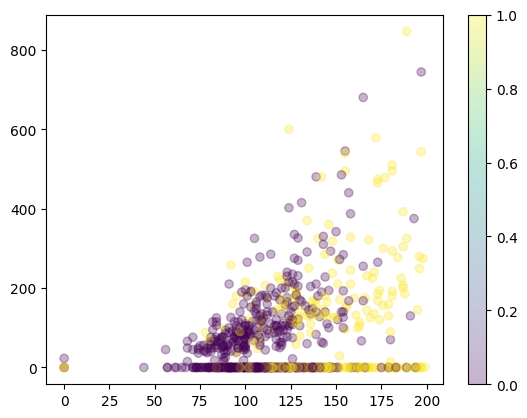

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Glucose"],df["Insulin"], c=y, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

### Splitting the Data Into Training and Testing Set

The data is split into *training* and *testing* sets.

To split the data into a training and testing datasets, we can use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `sklearn`. This function splits arrays or matrices into random train and test subsets and returns a list containing train-test split of inputs.

As we observe, in our case, the function `train_test_split` takes four arguments:

- `X`: Input dataframe
- `y`: Outpur dataframe
- `test_size`: Should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
- `random_state`: Controls the shuffling applied to the data before applying the split. Ensures the reproducibility of the results across multiple function calls

In the code cell below, fill in the ellipsis to set the argument `test_size` equal to `0.25` and `random_state` equal to `0`.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 0)


## Setting up the Classifiers

The last step involves initializing the classifiers and running the algorithm.

In the code cell below, we've imported the classifiers [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) from `sklearn`.

Run the code cell below.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
names = ["Logistic Regression", "Linear SVM"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear")]

The `LogisticRegression` classifier is instantiated and is fitted into our training sets.

Run the code cell below.

In [ ]:
log_clf = LogisticRegression(max_iter = 150).fit(X_train, y_train)
log_clf.score(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7604166666666666

In the code cell below, fill in the ellipsis with the name of the classifier. A SVM classifier is used in this case.

Compute the score by running the code cell below.

In [ ]:
svm_clf = SVC(random_state=0).fit(X_train, y_train)

svm_clf.score(X_train, y_train)

0.7586805555555556

- **Which model performs better?**


**DOUBLE CLICK ON THE CELL TO TYPE YOUR ANSWER**

**YOUR ANSWER HERE:** The Logistic Regression Model

## Testing the Models

Now it is time to test our model on the testing sets.

The `predict()` function is used to make a prediction on the `y` testing set.


Run the code cell below.

In [ ]:
y_eval_lr = log_clf.predict(X_test)

The accuracy of the model is computed.

In [ ]:
acc = sum(y_eval_lr == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 79.69%


The accuracy of svm model is computed by evaluating `y_eval_sum` on the testing set.


In [ ]:
y_eval_svm = svm_clf.predict(X_test)


Run the code cell below to compute the acuracy for this model.

In [ ]:
acc = sum(y_eval_svm == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 77.08%


## Model building using PCA

In [ ]:
# Load the diabetes dataset
diabetes_file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(diabetes_file_path)

In [ ]:
# Extract features and target
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']


Now, using the diabetes dataset, and the dimensionality reduction concept of Principal Component Analysis(PCA) we can see the model building using Logistic regression and Support Vector Machine

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler s a technique used for standardizing the features (variables) in a dataset.

PCA is first instantiated using `PCA()` function. The number of dimensions can be mentioned using n_components inside PCA().   

For fitting the PCA on the data, `pca.fit_transform()` is used.

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


The explained variance ratio is used in Principal Component Analysis (PCA) to determine the amount of variance each principal component captures from the original data. It is a crucial metric because it helps in understanding how much information (variance) can be attributed to each principal component relative to the total variance in the dataset.

To determine the optimal number of components, the cumulative explained variance is plotted and the "elbow" is indentified in the plot.

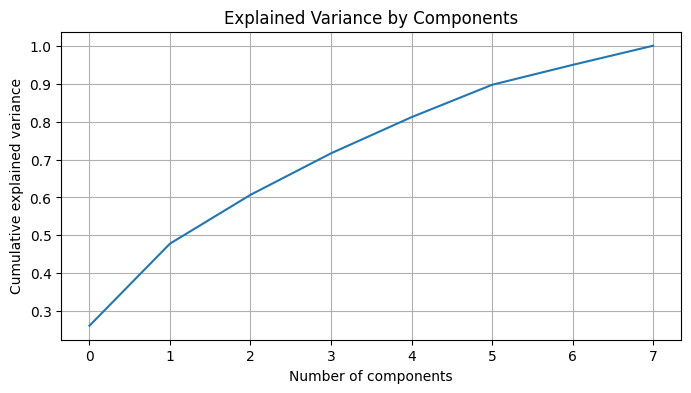

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

This plot will help you decide how many components are necessary to capture most of the variance in the data. The point at which the curve starts to flatten out is the optimal number of components.In this case, it can be seen that with 5 components, the curve starts to flatten up. So the n_components=5 is used and the this dataset is used for model building and testing.

In [ ]:
# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

The logistic regression and Support Vector Machine models are run using X_PCA dataset.

In [ ]:

# Train and evaluate SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)

In [ ]:
# Train and evaluate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

In [ ]:
# Print results
svc_report = classification_report(y_test, svc_predictions)
logreg_report = classification_report(y_test, logreg_predictions)

In [ ]:
print("SVC Accuracy:", svc_accuracy)

print("Logistic Regression Accuracy:", logreg_accuracy)


SVC Accuracy: 0.7207792207792207
Logistic Regression Accuracy: 0.7272727272727273


When comparing the accuraries, with PCA and without PCA it can be observed that with PCA although there is slight reduction in accuracy, the number of dimensions used are lesser. This can reduce the computational cost of the model.

**Perform comparatively analysis of model with and without PCA**


**YOUR ANSWER HERE:** The models using PCA has lesser accuracy, than the models without using PCA